# NCAA KAGGLE COMPETITION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline
sns.set_context('notebook',font_scale=1.5)

# Testing out the package

In [2]:
import sys

In [3]:
#alter the line below to correspond to your file system
ncaa_dir = '/Users/nickc/Documents/ncaa_kaggle'
sys.path.append(ncaa_dir)

In [4]:
import ncaa_kaggle.ncaa_data as nc_data

### Checking out a single year before we grab all the data we need

In [21]:
#create instance
ncaa = nc_data.data_clean(2016)

In [22]:
# add statistics from that paper
ncaa.paper_statistics()

Paper Stats Added!


Pick any stat you want. See function discription for choices

In [23]:
ncaa.stat_select('fgm')

fgm saved to daily_stat_dict!


In [24]:
ncaa.daily_stat_dict['fgm'].tail()

,1101,1102,1103,1104,1105,1106,1107,1108,1110,1111,...,1455,1456,1457,1458,1459,1460,1461,1462,1463,1464
128,23.814815,23.233333,26.100000,22.466667,23.25,24.964286,25.193548,22.857143,20.354839,23.193548,...,25.064516,26.793103,26.896552,23.709677,23.433333,24.30303,21.966667,27.066667,26.185185,26.966667
129,23.814815,23.233333,25.935484,22.645161,23.25,24.793103,25.193548,22.857143,20.354839,23.193548,...,25.064516,26.793103,26.896552,23.468750,23.433333,24.30303,21.966667,27.322581,26.185185,26.966667
130,23.814815,23.233333,26.031250,22.531250,23.25,24.793103,25.193548,22.857143,20.354839,23.193548,...,25.064516,26.793103,26.896552,23.468750,23.433333,24.30303,21.966667,27.375000,26.185185,26.966667
131,23.814815,23.233333,25.939394,22.531250,23.25,24.793103,25.193548,22.857143,20.354839,23.193548,...,25.064516,26.793103,26.896552,23.468750,23.433333,24.30303,21.966667,27.375000,26.185185,26.966667
132,23.814815,23.233333,25.939394,22.531250,23.25,24.793103,25.193548,22.857143,20.354839,23.193548,...,25.064516,26.793103,26.896552,23.468750,23.433333,24.30303,21.966667,27.375000,26.185185,26.966667


Add rpi and the components of rpi to our data

In [25]:
#calculate the daily schedule to be used for the percentages
ncaa.daily_schedule() #5 seconds
ncaa.daily_win_percentage()
ncaa.daily_win_percentage2()
ncaa.daily_win_percentage3()
ncaa.rpi()

Schedule has been calculated!
win_perc saved to daily_stat_dict!
win_perc2 saved to daily_stat_dict!
win_perc3 saved to daily_stat_dict!
rpi saved to daily_stat_dict!


Check out the keys in our data dictionary

In [26]:
ncaa.daily_stat_dict.keys()

['win_perc2', 'fgm', 'win_perc3', 'rpi', 'win_perc']

Calculate the end of season statistics so that we can eventually call the tournament stats.

In [27]:
ncaa.end_of_season_stats()

end of season stats calculated (eos_stats)


In [28]:
r = ncaa.eos_stats

In [29]:
r.head()

,win_perc2,fgm,win_perc3,rpi,win_perc
1101,0.393958,23.814815,0.464452,0.497382,0.333333
1102,0.503558,23.233333,0.480736,0.566258,0.400000
1103,0.460686,25.939394,0.553005,0.770462,0.757576
1104,0.595126,22.531250,0.585398,0.722731,0.562500
1105,0.341014,23.250000,0.436127,0.481888,0.357143


In [15]:
features = ncaa.tourney_f_data
targets = ncaa.tourney_t_data

In [16]:
features.head()

,win_perc2_1,fgm_1,win_perc3_1,rpi_1,win_perc_1,win_perc2_2,fgm_2,win_perc3_2,rpi_2,win_perc_2
0,0.536821,25.068966,0.468458,0.558089,0.379310,0.324470,23.655172,0.391448,0.552704,0.551724
1,0.687797,29.121212,0.607343,0.884712,0.818182,0.452897,26.806452,0.468679,0.734661,0.774194
2,0.660218,25.535714,0.550174,0.868713,0.857143,0.481529,23.535714,0.495102,0.725076,0.714286
3,0.532616,25.548387,0.528043,0.784272,0.774194,0.586399,25.656250,0.600923,0.775186,0.656250
4,0.579575,27.586207,0.538397,0.845127,0.862069,0.425358,22.620690,0.478339,0.759302,0.827586


In [17]:
targets.head()

,0
0,1
1,1
2,1
3,1
4,1


In [18]:
targets.tail()

,0
123,0
124,0
125,0
126,0
127,0


# Grab Feature Data for Training a Model

In [19]:
from IPython.display import clear_output

In [31]:
stats = ['score', 'fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast',
 'to', 'stl', 'blk', 'pf', 'poss', 'oe', 'de', 'efg', 'eto', 'eor', 'eftr']
F = []
T = []
#create instance
for yr in range(2003,2016):
    print(yr)
    print()
    ncaa = nc_data.data_clean(yr)
    
    # add statistics from that paper
    ncaa.paper_statistics()
    
    #add all the stats to our dictionary
    for stat in stats:
        ncaa.stat_select(stat)
    #add rpi to that
    ncaa.daily_schedule() #5 seconds
    ncaa.daily_win_percentage()
    ncaa.daily_win_percentage2()
    ncaa.daily_win_percentage3()
    ncaa.rpi()
    
    #calculate the end of season stats
    ncaa.end_of_season_stats()
    
    #calculate the features
    ncaa.tourney_features()
    
    features = ncaa.tourney_f_data
    targets = ncaa.tourney_t_data
    
    F.append(features)
    T.append(targets)
    
    clear_output()
    
    

In [38]:
import pickle
year_stats = [F,T]
#pickle.dump( year_stats, open( "../data/year_stats.p", "wb" ) )
#G = pickle.load( open( "year_stats.p", "rb" ) )

In [37]:
F[1]

,rpi_1,win_perc2_1,win_perc3_1,fga3_1,fga_1,fta_1,to_1,score_1,pf_1,blk_1,...,de_2,fgm_2,dr_2,poss_2,stl_2,oe_2,eto_2,eor_2,win_perc_2,or_2
0,0.530982,0.401840,0.394378,24.400000,55.766667,24.533333,16.933333,72.100000,21.900000,1.600000,...,1.721744,22.750000,24.428571,36.055714,7.178571,1.888736,0.452935,0.314124,0.642857,11.178571
1,0.743993,0.692613,0.555473,18.620690,55.000000,21.862069,13.275862,72.206897,18.344828,3.103448,...,2.036621,26.310345,22.206897,40.953103,10.275862,1.773965,0.315068,0.364383,0.862069,13.206897
2,0.857944,0.649189,0.573112,15.969697,62.636364,20.212121,13.787879,79.090909,16.060606,8.727273,...,1.685740,23.833333,24.900000,38.748000,7.000000,1.748765,0.351940,0.327845,0.733333,11.633333
3,0.763506,0.604725,0.524649,14.066667,54.566667,20.600000,13.433333,70.866667,17.400000,2.366667,...,1.577124,23.531250,25.781250,34.459500,4.531250,2.069225,0.471536,0.378478,0.750000,12.218750
4,0.900177,0.682491,0.615358,19.531250,58.468750,23.843750,14.187500,79.750000,18.718750,6.812500,...,1.879439,20.566667,22.766667,29.284800,7.066667,2.223252,0.667329,0.371628,0.533333,11.700000
5,0.863627,0.556432,0.518003,15.724138,56.379310,23.482759,13.551724,82.344828,15.931034,3.793103,...,1.656394,24.758621,26.517241,37.793379,6.655172,1.948398,0.452706,0.331698,0.586207,11.896552
6,0.781480,0.470987,0.499880,15.655172,55.206897,26.103448,13.000000,74.344828,20.310345,4.172414,...,1.790694,26.933333,24.933333,38.692800,6.533333,2.025946,0.406661,0.325527,0.666667,10.233333
7,0.794085,0.674300,0.617686,15.333333,63.666667,25.700000,15.133333,77.366667,19.500000,6.766667,...,1.926064,25.655172,24.068966,40.563310,7.000000,1.889802,0.356733,0.320331,0.758621,10.275862
8,0.779204,0.607614,0.521268,14.300000,58.766667,23.933333,13.000000,75.500000,18.300000,4.700000,...,1.947452,25.000000,21.379310,34.619586,7.068966,2.123754,0.457452,0.324413,0.620690,9.103448
9,0.786697,0.719917,0.570579,18.357143,64.107143,25.428571,15.642857,83.071429,18.500000,4.214286,...,2.563375,20.285714,15.357143,31.268571,7.785714,1.945614,0.365491,0.247548,0.785714,6.142857


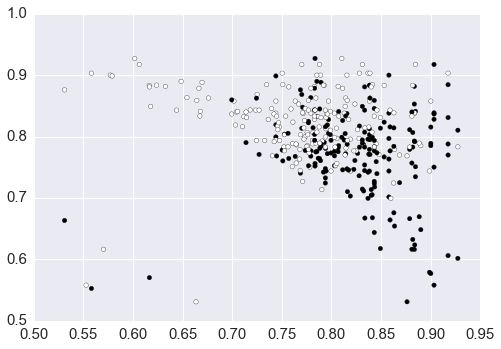

In [39]:
plt.scatter(F[1]['rpi_1'],F[1]['rpi_2'],c = T[1]) # 2004
plt.scatter(F[2]['rpi_1'],F[2]['rpi_2'],c = T[2]) # 2005
plt.scatter(F[3]['rpi_1'],F[3]['rpi_2'],c = T[3]) # 2006

# Grab Feature data for submitting to the competition

In [6]:
from IPython.display import clear_output

In [12]:
stats = ['score', 'fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast',
 'to', 'stl', 'blk', 'pf', 'poss', 'oe', 'de', 'efg', 'eto', 'eor', 'eftr']

F = []
#create instance
for yr in range(2012,2016):
    print(yr)
    print()
    ncaa = nc_data.data_clean(yr)
    
    # add statistics from that paper
    ncaa.paper_statistics()
    
    #add all the stats to our dictionary
    for stat in stats:
        ncaa.stat_select(stat)
    #add rpi to that
    ncaa.daily_schedule() #5 seconds
    ncaa.daily_win_percentage()
    ncaa.daily_win_percentage2()
    ncaa.daily_win_percentage3()
    ncaa.rpi()
    
    #calculate the end of season stats
    ncaa.end_of_season_stats()
    
    #calculate the features
    ncaa.submission_df()
    ncaa.submission_features()
    
    features = ncaa.submission_f_data
    
    F.append(features)
    
    clear_output()
    
    

In [23]:
len(F)

4

In [17]:
import pickle

#pickle.dump( F, open( "submission_features.p", "wb" ) )
#G = pickle.load( open( "submission_features.p", "rb" ) )

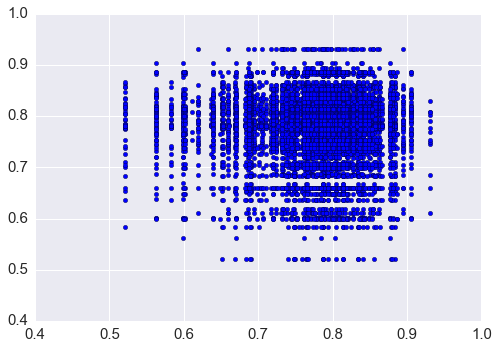

In [18]:
plt.scatter(F[0]['rpi_1'],F[0]['rpi_2'])#,c = T[0]) # 2004
plt.scatter(F[1]['rpi_1'],F[1]['rpi_2'])#,c = T[1]) # 2005
plt.scatter(F[2]['rpi_1'],F[2]['rpi_2'])#,c = T[2]) # 2006

In [22]:
len(F[0]) + len(F[1]) + len(F[2]) + len(F[3])

9112

# Round 2 Submission

In [ ]:
from IPython.display import clear_output

In [40]:
stats = ['score', 'fgm', 'fga', 'fgm3', 'fga3', 'ftm', 'fta', 'or', 'dr', 'ast',
 'to', 'stl', 'blk', 'pf', 'poss', 'oe', 'de', 'efg', 'eto', 'eor', 'eftr']

F = []
#create instance
yr = 2016
ncaa = nc_data.data_clean(yr)

# add statistics from that paper
ncaa.paper_statistics()

#add all the stats to our dictionary
for stat in stats:
    ncaa.stat_select(stat)
#add rpi to that
ncaa.daily_schedule() #5 seconds
ncaa.daily_win_percentage()
ncaa.daily_win_percentage2()
ncaa.daily_win_percentage3()
ncaa.rpi()

#calculate the end of season stats
ncaa.end_of_season_stats()

#calculate the features
ncaa.submission_df()
ncaa.submission_features()

features = ncaa.submission_f_data

F.append(features)

clear_output()
    
    

In [43]:
F = F[0]

In [45]:
import pickle

#pickle.dump( F, open( "../data/submission_features.p", "wb" ) )

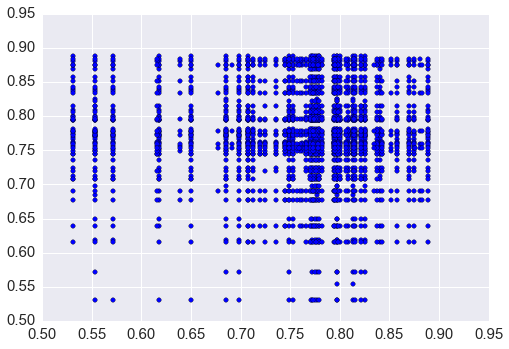

In [44]:
plt.scatter(F['rpi_1'],F['rpi_2'])#,c = T[0]) # 2004

# Checking out the Ken Pom data

In [5]:
kp = nc_data.KenPom()

In [6]:
kp.tourney_features()

Features stored in tourney_f_data
Targets stored in tourney_t_data


In [7]:
F = kp.tourney_f_data
T = kp.tourney_t_data

In [8]:
F.head()

,Tempo_1,PosLO_1,PosLD_1,OE_1,DE_1,Tempo_2,PosLO_2,PosLD_2,OE_2,DE_2
0,63.3,19.4,18.5,102.0,103.1,69.9,17.2,16.9,108.2,110.8
1,66.2,19.3,17.4,113.9,102.9,65.8,18.0,18.3,110.8,100.6
2,60.3,20.5,18.7,103.1,104.6,67.4,17.2,18.0,106.2,113.6
3,62.9,19.7,18.5,116.3,94.8,70.4,15.1,19.3,119.8,102.7
4,64.6,18.3,18.1,112.2,91.8,65.7,18.7,17.6,111.1,99.2


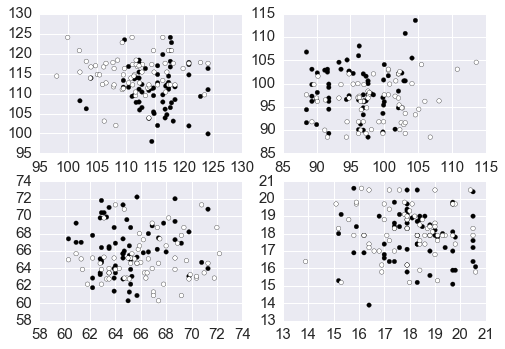

In [9]:
fig,axes = plt.subplots(2,2)
ax=axes.ravel()
ax[0].scatter(F['OE_1'],F['OE_2'],c=T.values)
ax[1].scatter(F['DE_1'],F['DE_2'],c=T.values)
ax[2].scatter(F['Tempo_1'],F['Tempo_2'],c=T.values)
ax[3].scatter(F['PosLO_1'],F['PosLO_2'],c=T.values);

In [10]:
from sklearn.cross_validation import train_test_split

In [11]:
from sklearn import linear_model

In [12]:
x_train,x_test,y_train,y_test = train_test_split(F.values,T.values.ravel(),test_size=0.33)

In [13]:
logreg = linear_model.LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
logreg.score(x_test,y_test)

0.73333333333333328

Let's get an idea of the variation

In [24]:
s = []
for ii in range(5000):
    x_train,x_test,y_train,y_test = train_test_split(F.values,T.values.ravel(),test_size=0.33)
    logreg = linear_model.LogisticRegression()
    logreg.fit(x_train, y_train)
    s.append(logreg.score(x_test,y_test))

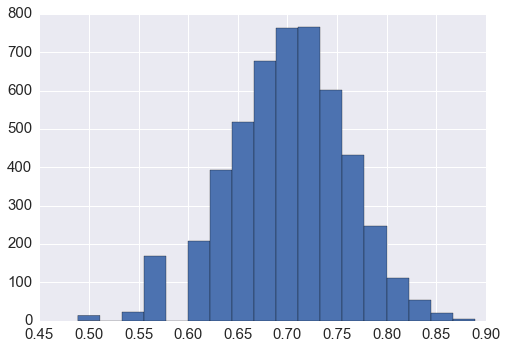

In [28]:
plt.hist(s,18);

**Check out some Log loss**

In [29]:
def log_loss(prob,actual):
    """
    Calculate the log loss the probabilities and the acutal
    outcome of the game
    """

    prob[prob>.98]=.98
    prob[prob<=.02] = .02
    LL = actual*np.log(prob) + (1-actual)*np.log(1-prob)
    LL = -np.mean(LL)

    return LL

**Iterate over log losses**

In [33]:
pr = logreg.predict_proba(x_test)[:,1]

In [34]:
log_loss(pr,y_test)

0.46807898659402025

In [35]:
s = []
for ii in range(5000):
    x_train,x_test,y_train,y_test = train_test_split(F.values,T.values.ravel(),test_size=0.33)
    logreg = linear_model.LogisticRegression()
    logreg.fit(x_train, y_train)
    pr = logreg.predict_proba(x_test)[:,1]
    s.append(log_loss(pr,y_test))

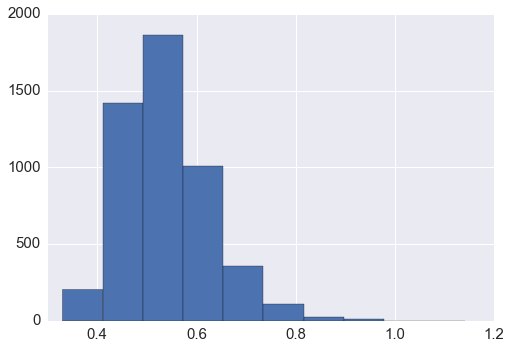

In [37]:
plt.hist(s);

# Saving

In [2]:
#import pickle
# favorite_color = { "lion": "yellow", "kitty": "red" }

#pickle.dump( year_stats, open( "year_stats.p", "wb" ) )
#G = pickle.load( open( "year_stats.p", "rb" ) )